# Uma análise comparativa entre as notas de todas as áreas do conhecimento do ENEM

## Primeiros passos

importação das bibliotecas que serão utilizadas no decorrer da análise

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as npnp
import geopandas as gpd

Os microdados do ENEM têm aproximadamente 3 MB, tornando muito custoso o ato de carregar o conjunto de dados por inteiro na memória. Assim, selecionaremos aleatoriamente uma amostra de aproximadamente 50 mil usuários, o que representa cerca de 1% do total de alunos que realizaram o exame em 2019.

Esse valor escolhido pois garante que, ainda após uma etapa futura quando removeremos algumas linhas, teremos uma amostra que apresenta 99% de grau de confiança e 0.7% de margem de erro.

In [3]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004822,2019,1501402,Belém,15,PA,18,M,1,1,...,A,A,A,C,B,A,D,B,B,B
1,190001004954,2019,1506807,Santarém,15,PA,31,F,3,3,...,A,A,A,B,A,A,C,A,B,B
2,190001004980,2019,1501402,Belém,15,PA,28,F,1,1,...,A,A,A,B,B,A,E,A,A,B
3,190001005170,2019,1500800,Ananindeua,15,PA,23,F,1,2,...,A,A,A,B,B,A,B,A,A,A
4,190001005321,2019,1500602,Altamira,15,PA,20,M,1,0,...,B,A,A,A,B,A,B,A,B,B


Aqui nós setamos um estilo seguindo o padrão constituído para o restante do projeto.

In [4]:
sns.set_style('whitegrid')

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f5c740"]

sns.set_palette(flatui)

## Preparação dos dados

A fim de otimizar recursos e facilitar a visualização do DataFrame vamos selecionar agora apenas as colunas que serão utilizadas no decorrer da análise.

In [5]:
df = df[['SG_UF_RESIDENCIA', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

### Tratando os dados nulos

Primeiro vamos remover todas notas que tenham valor nulo pois para o nosso contexto não faz sentido elas existirem, visto que a ideia é analisar a influência das notas de diferentes áreas do conhecimento entre si

In [6]:
df.isnull().sum()

SG_UF_RESIDENCIA        0
NU_NOTA_LC          11557
NU_NOTA_CH          11557
NU_NOTA_CN          13687
NU_NOTA_MT          13687
NU_NOTA_REDACAO     11557
dtype: int64

In [7]:
df.dropna(inplace=True)

Agora que já não existe valores nulos no DataFrame, vamos gerar a média de todas as notas sem levar em consideração nenhum peso, dividindo apenas a soma delas por 5.

In [8]:
df['NU_NOTA_GERAL'] = df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)/5

df['NU_NOTA_GERAL'].head()

0    509.90
2    454.20
4    501.08
5    542.12
8    607.04
Name: NU_NOTA_GERAL, dtype: float64

### Configurando Cloropeth Map dos Estados Brasileiros

O Cloropeth será utilizado para visualização da incidência das notas por estado brasileiro.

Inicialmente vamos carregar o arquivo "bcim_2016_21_11_2018.gpkg", esse arquivo contém uma série de camadas que são relevantes para esse tipo de visualização.

O arquivo foi encontrado no site https://www.ibge.gov.br/ seguindo os seguintes passos:

Geociências -> Downloads -> cartas_e_mapas -> bcim -> versao2016 — geopackage

In [84]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

INFOS_UFS.head()

/home/lucas/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


Aqui isolamos as informações que são relevantes para esse plot, renomeamos o nome das colunas referentes aos UFs de forma que fiquem iguais sendo possível então fazer um merge nos dataframes e então adicionamos o resultado ao dataframe denominado BRASIL, que será usado mais adiante.

In [85]:
df_nota_geral = df[['NU_NOTA_GERAL', 'SG_UF_RESIDENCIA']].copy()

INFOS_UFS.rename({'sigla': 'state'}, axis=1, inplace=True)
df_nota_geral.rename({'SG_UF_RESIDENCIA': 'state'}, axis=1, inplace=True)

df_nota_geral = df_nota_geral.groupby(by='state').mean()

BRASIL = INFOS_UFS.merge(df_nota_geral, on='state', how='left')

BRASIL[['state', 'NU_NOTA_GERAL', 'geometry']].head()

,state,NU_NOTA_GERAL,geometry
0,GO,523.215362,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,512.607803,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,534.773411,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,540.211506,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,512.017282,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


## Análise dos dados

Abaixo nós fazemos uma visualização do gráfico que cada nota gera de forma individual.

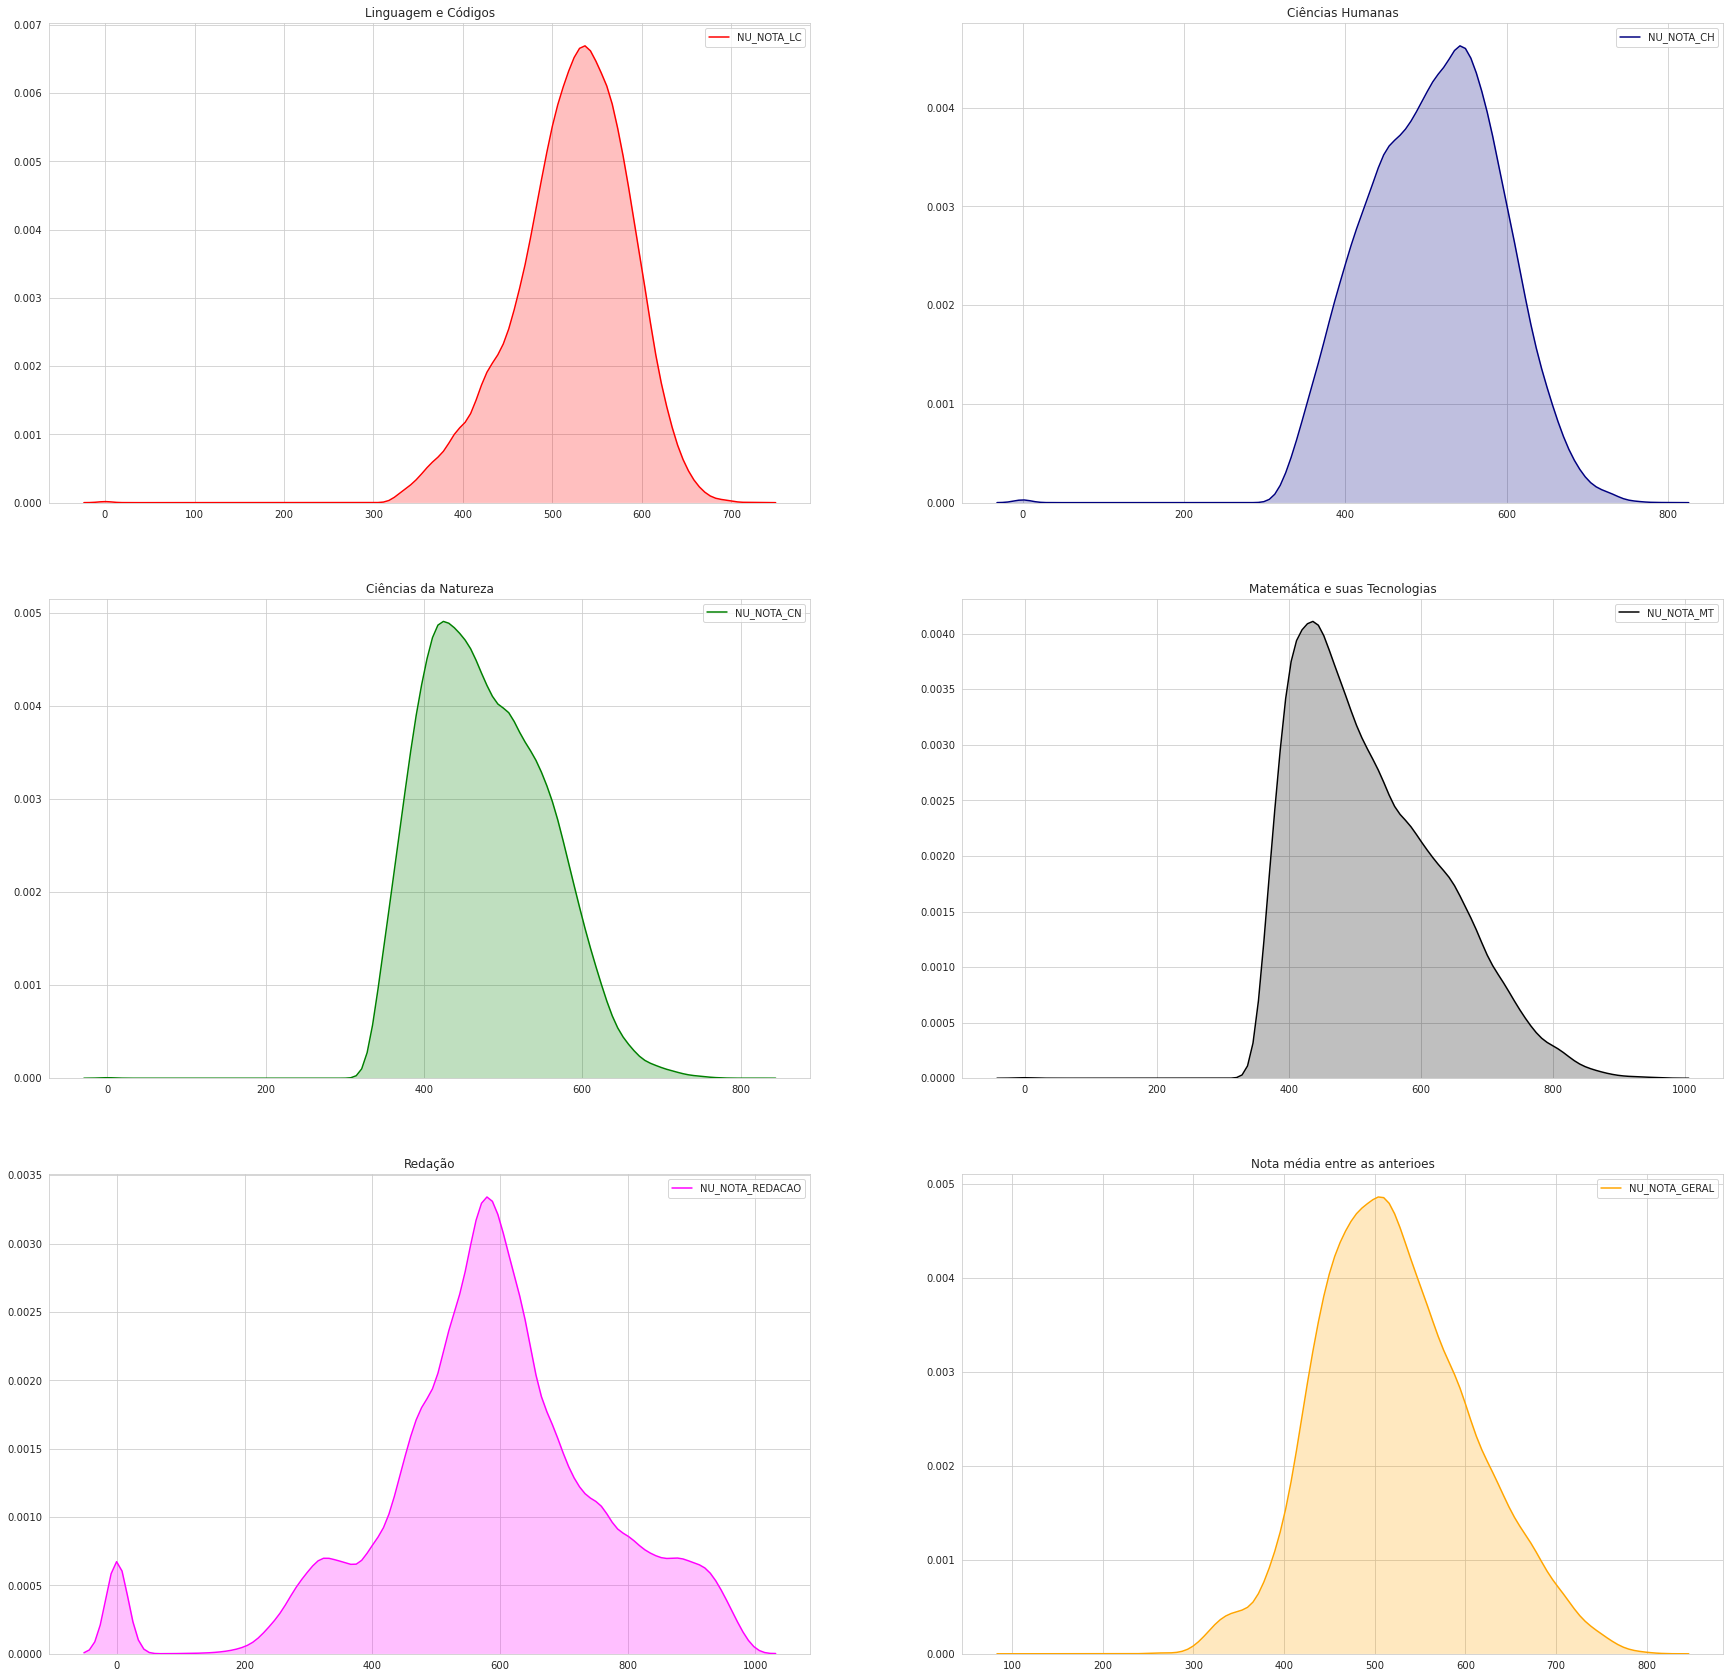

In [94]:
fig, ax = plt.subplots(3, 2, figsize=(30,30))

sns.kdeplot(df['NU_NOTA_LC'], ax=ax[0][0], color='r', shade=True)
sns.kdeplot(df['NU_NOTA_CH'], ax=ax[0][1], color='navy', shade=True)
sns.kdeplot(df['NU_NOTA_CN'], ax=ax[1][0], color='g', shade=True)
sns.kdeplot(df['NU_NOTA_MT'], ax=ax[1][1], color='black', shade=True)
sns.kdeplot(df['NU_NOTA_REDACAO'], ax=ax[2][0], color='magenta',  shade=True)
sns.kdeplot(df['NU_NOTA_GERAL'], ax=ax[2][1], color='orange', shade=True)

ax[0][0].set_title('Linguagem e Códigos')
ax[0][1].set_title('Ciências Humanas')
ax[1][0].set_title('Ciências da Natureza')
ax[1][1].set_title('Matemática e suas Tecnologias')
ax[2][0].set_title('Redação')
ax[2][1].set_title('Nota média entre as anterioes')

plt.show()

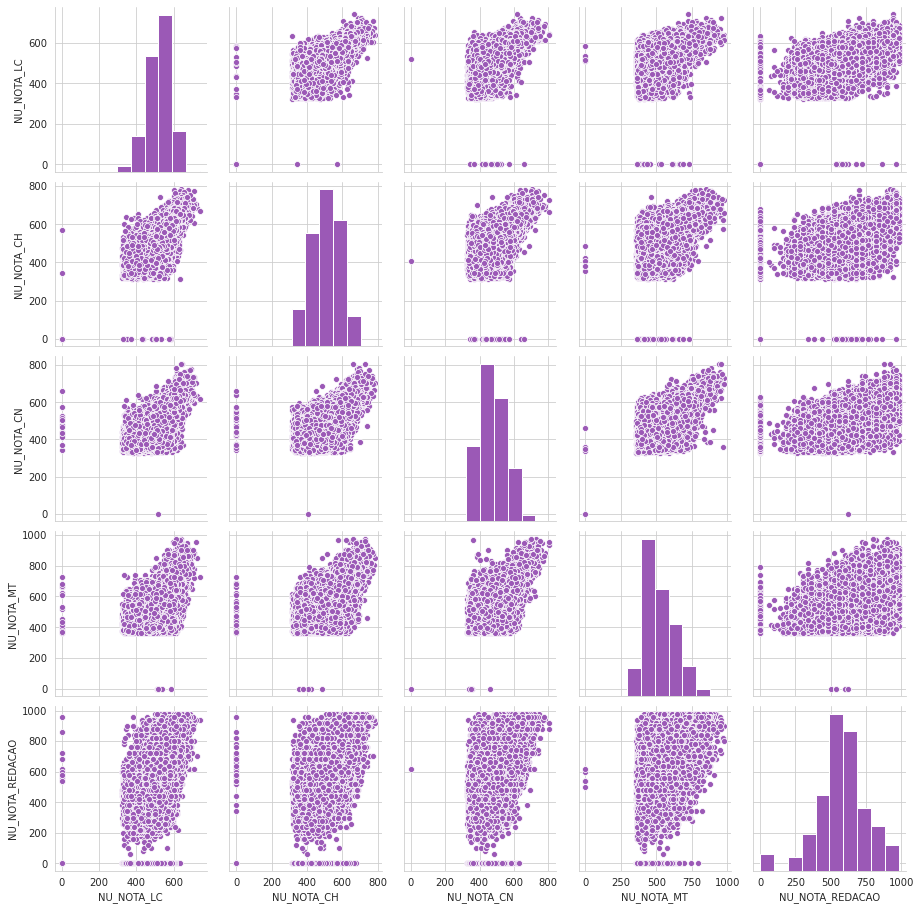

In [70]:
sns.pairplot(df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']])
plt.show()

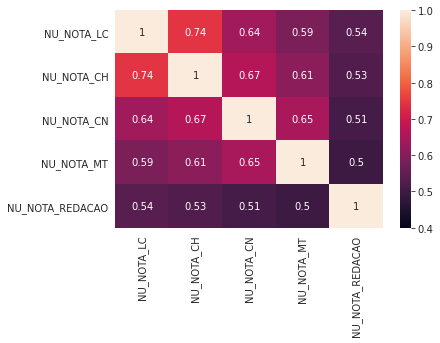

In [71]:
df_corr = df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

sns.heatmap(df_corr, vmin=0.4, vmax=1, annot=True)
plt.show()

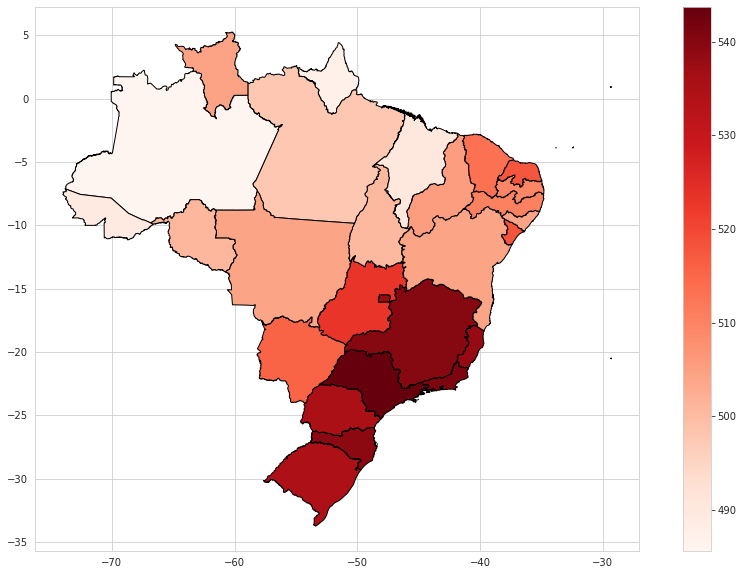

In [73]:
BRASIL.plot(column='NU_NOTA_GERAL',
          cmap='Reds',
          figsize=(16,10),
          legend=True,
          edgecolor='black')

plt.show()